# N-gram analysis on the training data

Unigrams, Bigrams and Trigrams from the training dataset are plotted

In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from plotting_utils import *

In [2]:
FILE = "../data/data.parquet.gzip"
data = pd.read_parquet(FILE, columns=['processed_docs', 'target', 'target_name'])

In [3]:
## keep training samples only
train_idx = pickle.load(open("../data/wip/train_idx.pkl", 'rb'))
training_data = data.loc[train_idx]

In [4]:
del data

## Prep ngrams data

In [5]:
def get_ngrams_freq(text, ngram_range, n_top, max_features=None, max_df=1.0, min_df=1):

    vec = CountVectorizer(ngram_range=ngram_range, max_features=max_features, max_df=max_df, min_df=min_df)
    matrix = vec.fit_transform(text)
    sum_words = matrix.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    
    df_counts = pd.DataFrame(words_freq[:n_top])
    df_counts.columns=["n_grams", "frequency"]
    
    return df_counts

In [6]:
def get_ngrams(data, text_col, class_idx, class_col, ngram_range, n_top, max_features=None, max_df=1.0, min_df=1):
    keys = set(data[class_col])

    grouped = data.groupby(class_col)
    counts_dfs = dict.fromkeys(keys,[])
    for c, d in grouped:
        corpus = d[text_col]
        counts_dfs[c] = get_ngrams_freq(corpus, ngram_range, n_top, max_features=max_features, max_df=max_df, min_df=min_df)

    items = data.set_index(class_idx)[class_col].to_dict().items()
    items_to_plot = sorted(items)
    items_to_plot = {v: k for k, v in items_to_plot}
    
    return items_to_plot, grouped, counts_dfs

In [8]:
ngram_range = (1,1)
n_top=10
text_col = 'processed_docs'
class_col = 'target_name' 
class_idx = 'target'

items_to_plot, grouped, counts_dfs = get_ngrams(training_data, text_col, class_idx, class_col, ngram_range, n_top)

bow_ngrams1 = (items_to_plot, grouped, counts_dfs)
pickle.dump(bow_ngrams1, open('tmp/bow1.pkl','wb'))

In [22]:
ngram_range = (2,2)
n_top=10
text_col = 'processed_docs'
class_col = 'target_name' 
class_idx = 'target'

items_to_plot, grouped, counts_dfs = get_ngrams(training_data, text_col, class_idx, class_col, ngram_range, n_top)

bow_ngrams2 = (items_to_plot, grouped, counts_dfs)
pickle.dump(bow_ngrams2, open('tmp/bow2.pkl','wb'))

In [24]:
ngram_range = (3,3)
n_top=10
text_col = 'processed_docs'
class_col = 'target_name' 
class_idx = 'target'

items_to_plot, grouped, counts_dfs = get_ngrams(training_data, text_col, class_idx, class_col, ngram_range, n_top)

bow_ngrams3 = (items_to_plot, grouped, counts_dfs)
pickle.dump(bow_ngrams3, open('tmp/bow3.pkl','wb'))

## Plotting

In [19]:
def plot_ngrams(title, text_col, class_col, items_to_plot, grouped, counts_dfs):
    nrows = 2
    ncols = 2
    fig, axs = plt.subplots(nrows, ncols, figsize=(6,5), layout='constrained')

    plt.rc('axes', titlesize=8) 
    plt.rc('axes', labelsize=6)
    plt.rc('xtick', labelsize=8)
    
    for cat, dat in counts_dfs.items():
        labels = dat["n_grams"]
        width = dat["frequency"]
        items_to_plot[cat] = [labels, width]
        
    r=0
    c=0
    for k,v in items_to_plot.items():
        barplot(axs[r, c], labels=v[0], width=v[1], title='\n'+k, 
                barsize=.5, font_size=6,
                invert_y=True)
        if(c<ncols-1):
            c+=1
        else:
            r+=1
            c = 0
            
    fig.suptitle(title, fontsize=16)
    plt.show()

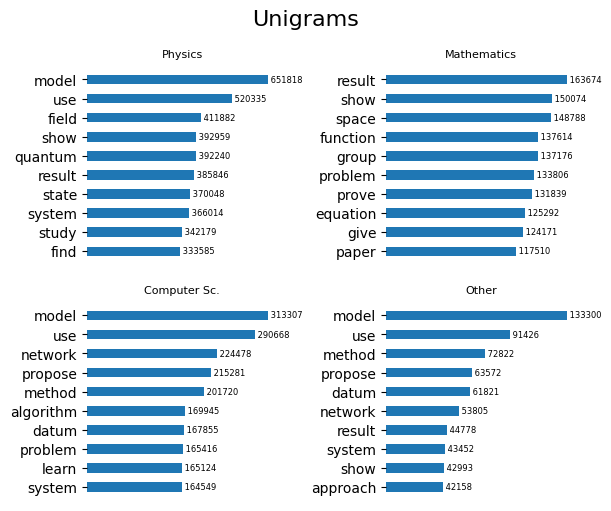

In [21]:
title = 'Unigrams'
text_col = 'processed_docs'
class_col = 'target_name'
with open('tmp/bow1.pkl','rb') as f:
    items_to_plot, grouped, counts_dfs = pickle.load(f)

plot_ngrams(title, text_col, class_col, items_to_plot, grouped, counts_dfs)

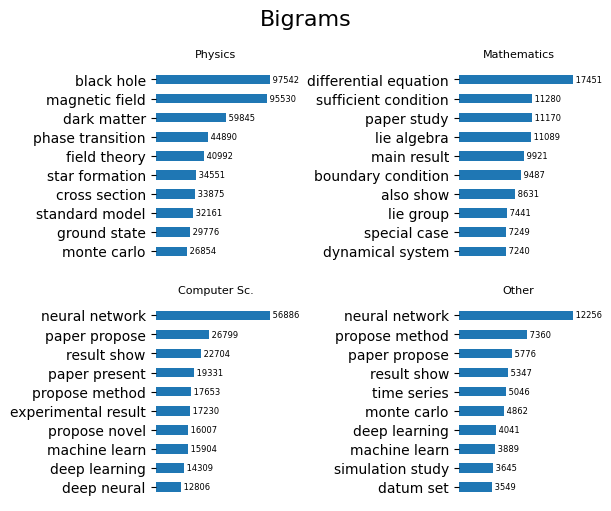

In [23]:
title = 'Bigrams'
text_col = 'processed_docs'
class_col = 'target_name'
with open('tmp/bow2.pkl','rb') as f:
    items_to_plot, grouped, counts_dfs = pickle.load(f)

plot_ngrams(title, text_col, class_col, items_to_plot, grouped, counts_dfs)

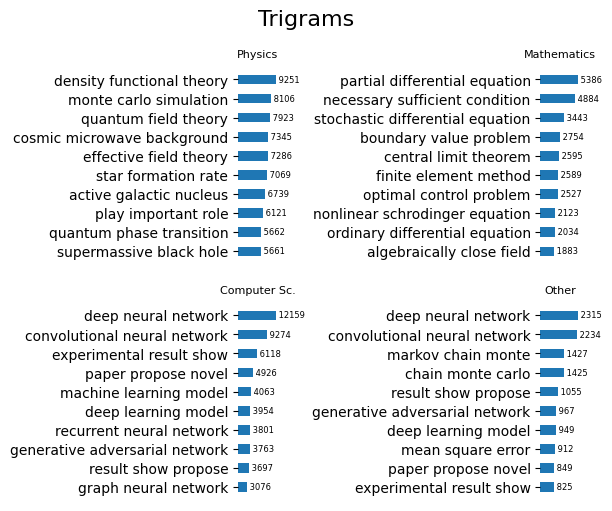

In [25]:
title = 'Trigrams'
text_col = 'processed_docs'
class_col = 'target_name'
with open('tmp/bow3.pkl','rb') as f:
    items_to_plot, grouped, counts_dfs = pickle.load(f)

plot_ngrams(title, text_col, class_col, items_to_plot, grouped, counts_dfs)